In [18]:
import seaborn as sns
import re
import nltk
import random
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import bigrams, trigrams
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer, WordNetLemmatizer
import missingno as msno
from nltk.stem import PorterStemmer, WordNetLemmatizer
import pandas as pd
import matplotlib.pyplot as plt
df= pd.read_excel("Diabetes_Continuous_Glucose_Monitoring.xlsx")

In [10]:
df

Post ID                                    Sound Bite Text  \
0       BRDRDT2-t1_imq98sr  My numbers are great now. Estimated a1c of 7%i...   
1       BRDRDT2-t1_impbcf4  I tried it for a little while. No side effects...   
2      1565738759353602048  i ran out of characters. youtu.be/RWgl2PDhQiM ...   
3        17944607459251789  MY lunch! Ate at 10:30am \n1 unit NovoLog insu...   
4       BRDRDT2-t1_imq8h9m  This is also because like a soak in a hot tub ...   
...                    ...                                                ...   
37839   BRDRDT2-t1_imokb3b  Push for it, it's a game changer in my opinion...   
37840   BRDRDT2-t1_imn2fob  (My mom learned to inject my 10 year old self ...   
37841   BRDRDT2-t1_imod0qi  I just spoke with a rep from Abbott. The rep t...   
37842    17865491111775314  It’s been 2.5 weeks since I started and I’m fe...   
37843   BRDRDT2-t1_imohltu  My first endo told me, paraphrasing, 'If you d...   

       Ratings and Scores                                              Title  \
0                     NaN  Have you been denied a second/third pump? Feel...   
1                     NaN                                          Metformin   
2                     NaN                                                NaN   
3                     NaN                                                NaN   
4                     NaN                   No bath salts, bath oils, soaks?   
...                   ...                                                ...   
37839                 NaN  If you were magically cured of type I diabetes...   
37840                 NaN                A question for the older Diabetics.   
37841                 NaN                           Apple IOS 16 public beta   
37842                 NaN                                                NaN   
37843                 NaN                A question for the older Diabetics.   

      Source Type             Post Type Is Paid Media Type  \
0          Forums  Replies and Comments      No   No Media   
1          Forums  Replies and Comments      No   No Media   
2         Twitter  Replies and Comments      No       Link   
3       Instagram              Original      No      Image   
4          Forums  Replies and Comments      No   No Media   
...           ...                   ...     ...        ...   
37839      Forums  Replies and Comments      No   No Media   
37840      Forums  Replies and Comments      No   No Media   
37841      Forums  Replies and Comments      No   No Media   
37842   Instagram              Original      No   No Media   
37843      Forums  Replies and Comments      No   No Media   

                                                     URL  \
0      https://www.reddit.com/r/diabetes_t1/comments/...   
1      https://www.reddit.com/r/diabetes_t1/comments/...   
2      http://twitter.com/bromid/statuses/15657387593...   
3               https://www.instagram.com/p/Ch-gqL-Onqk/   
4      https://www.reddit.com/r/diabetes/comments/x3e...   
...                                                  ...   
37839  https://www.reddit.com/r/diabetes_t1/comments/...   
37840  https://www.reddit.com/r/diabetes_t1/comments/...   
37841  https://www.reddit.com/r/Freestylelibre/commen...   
37842        https://www.instagram.com/reel/Ch7ctN_ge5r/   
37843  https://www.reddit.com/r/diabetes_t1/comments/...   

                                              Media Link  ...  \
0                                                    NaN  ...   
1                                                    NaN  ...   
2                                                    NaN  ...   
3      https://scontent-iad3-1.cdninstagram.com/v/t51...  ...   
4                                                    NaN  ...   
...                                                  ...  ...   
37839                                                NaN  ...   
37840                                                NaN  ...   
37841                             

In [11]:
sample_df = df.sample(n=5)

sample_bites = []
for i, row in sample_df.iterrows():
    bite = f"Sound Bite {i+1}: {row['Sound Bite Text']}"
    sample_bites.append(bite)
print('\n\n'.join(sample_bites))

Sound Bite 36289: It’s a very gradual decline over and hot or two and usually it ends up in the mid to high 60s but maybe it would go lower if my CGM doesn’t throw alarms at 69. I always treat with a snack just to shut the CGM up. Maybe it’s like the opposite of the dawn effect? I stop dumping glucose from my liver and my sugar drops.

Sound Bite 5831: 1. Absolutely. The next generation of Dexcom will be substatially smaller than the current G6. Miniaturization of tech is a generally reliable trend. 2. I don't understand the science of diagnostic testing well enough to know this for sure. I suppose it is possible, but right now and for the immediate future it is not possible to measure blood glucose without some sort of bodily fluid contact...and anything that is not blood itself lags behind by 15+ minutes, hence why even CGM's are not real time. 3. The cost, the short lifespans of the sensors, and the occasionally inaccurate or delayed results are my biggest complaints. Notification f

In [12]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37844 entries, 0 to 37843
Data columns (total 63 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Post ID                                      37844 non-null  object 
 1   Sound Bite Text                              37844 non-null  object 
 2   Ratings and Scores                           0 non-null      float64
 3   Title                                        36273 non-null  object 
 4   Source Type                                  37844 non-null  object 
 5   Post Type                                    35165 non-null  object 
 6   Is Paid                                      37844 non-null  object 
 7   Media Type                                   37844 non-null  object 
 8   URL                                          37844 non-null  object 
 9   Media Link                                   1253 non-null   object 
 10

In [13]:
list(df.columns)

['Post ID',
 'Sound Bite Text',
 'Ratings and Scores',
 'Title',
 'Source Type',
 'Post Type',
 'Is Paid',
 'Media Type',
 'URL',
 'Media Link',
 'Domain',
 'Sentiment',
 'Published Date (GMT-04:00) New York',
 'Author Gender',
 'Author URL',
 'Author Name',
 'Author Handle',
 'Author ID',
 'Author Location - Country 1',
 'Author Location - State/Province 1',
 'Author Location - City 1',
 'Author Location - Country 2',
 'Author Location - State/Province 2',
 'Author Location - City 2',
 'Author Location - Other',
 'Author Reddit Karma',
 'Followers/Daily Unique Visitors/Subscribers',
 'Professions',
 'Interests',
 'Positive Objects',
 'Negative Objects',
 'Richness',
 'Tags',
 'Quoted Post',
 'Quoted Author Name',
 'Quoted Author Handle',
 'Total Engagements',
 'Post Comments',
 'Post Likes',
 'Post Shares',
 'Post Views',
 'Post Dislikes',
 'Reddit Score',
 'Product Name',
 'Product Hierarchy',
 'Rating',
 '@Mention Media Tags',
 'Source Name',
 'LexisNexis Source Publisher',
 'LexisN

<Axes: >

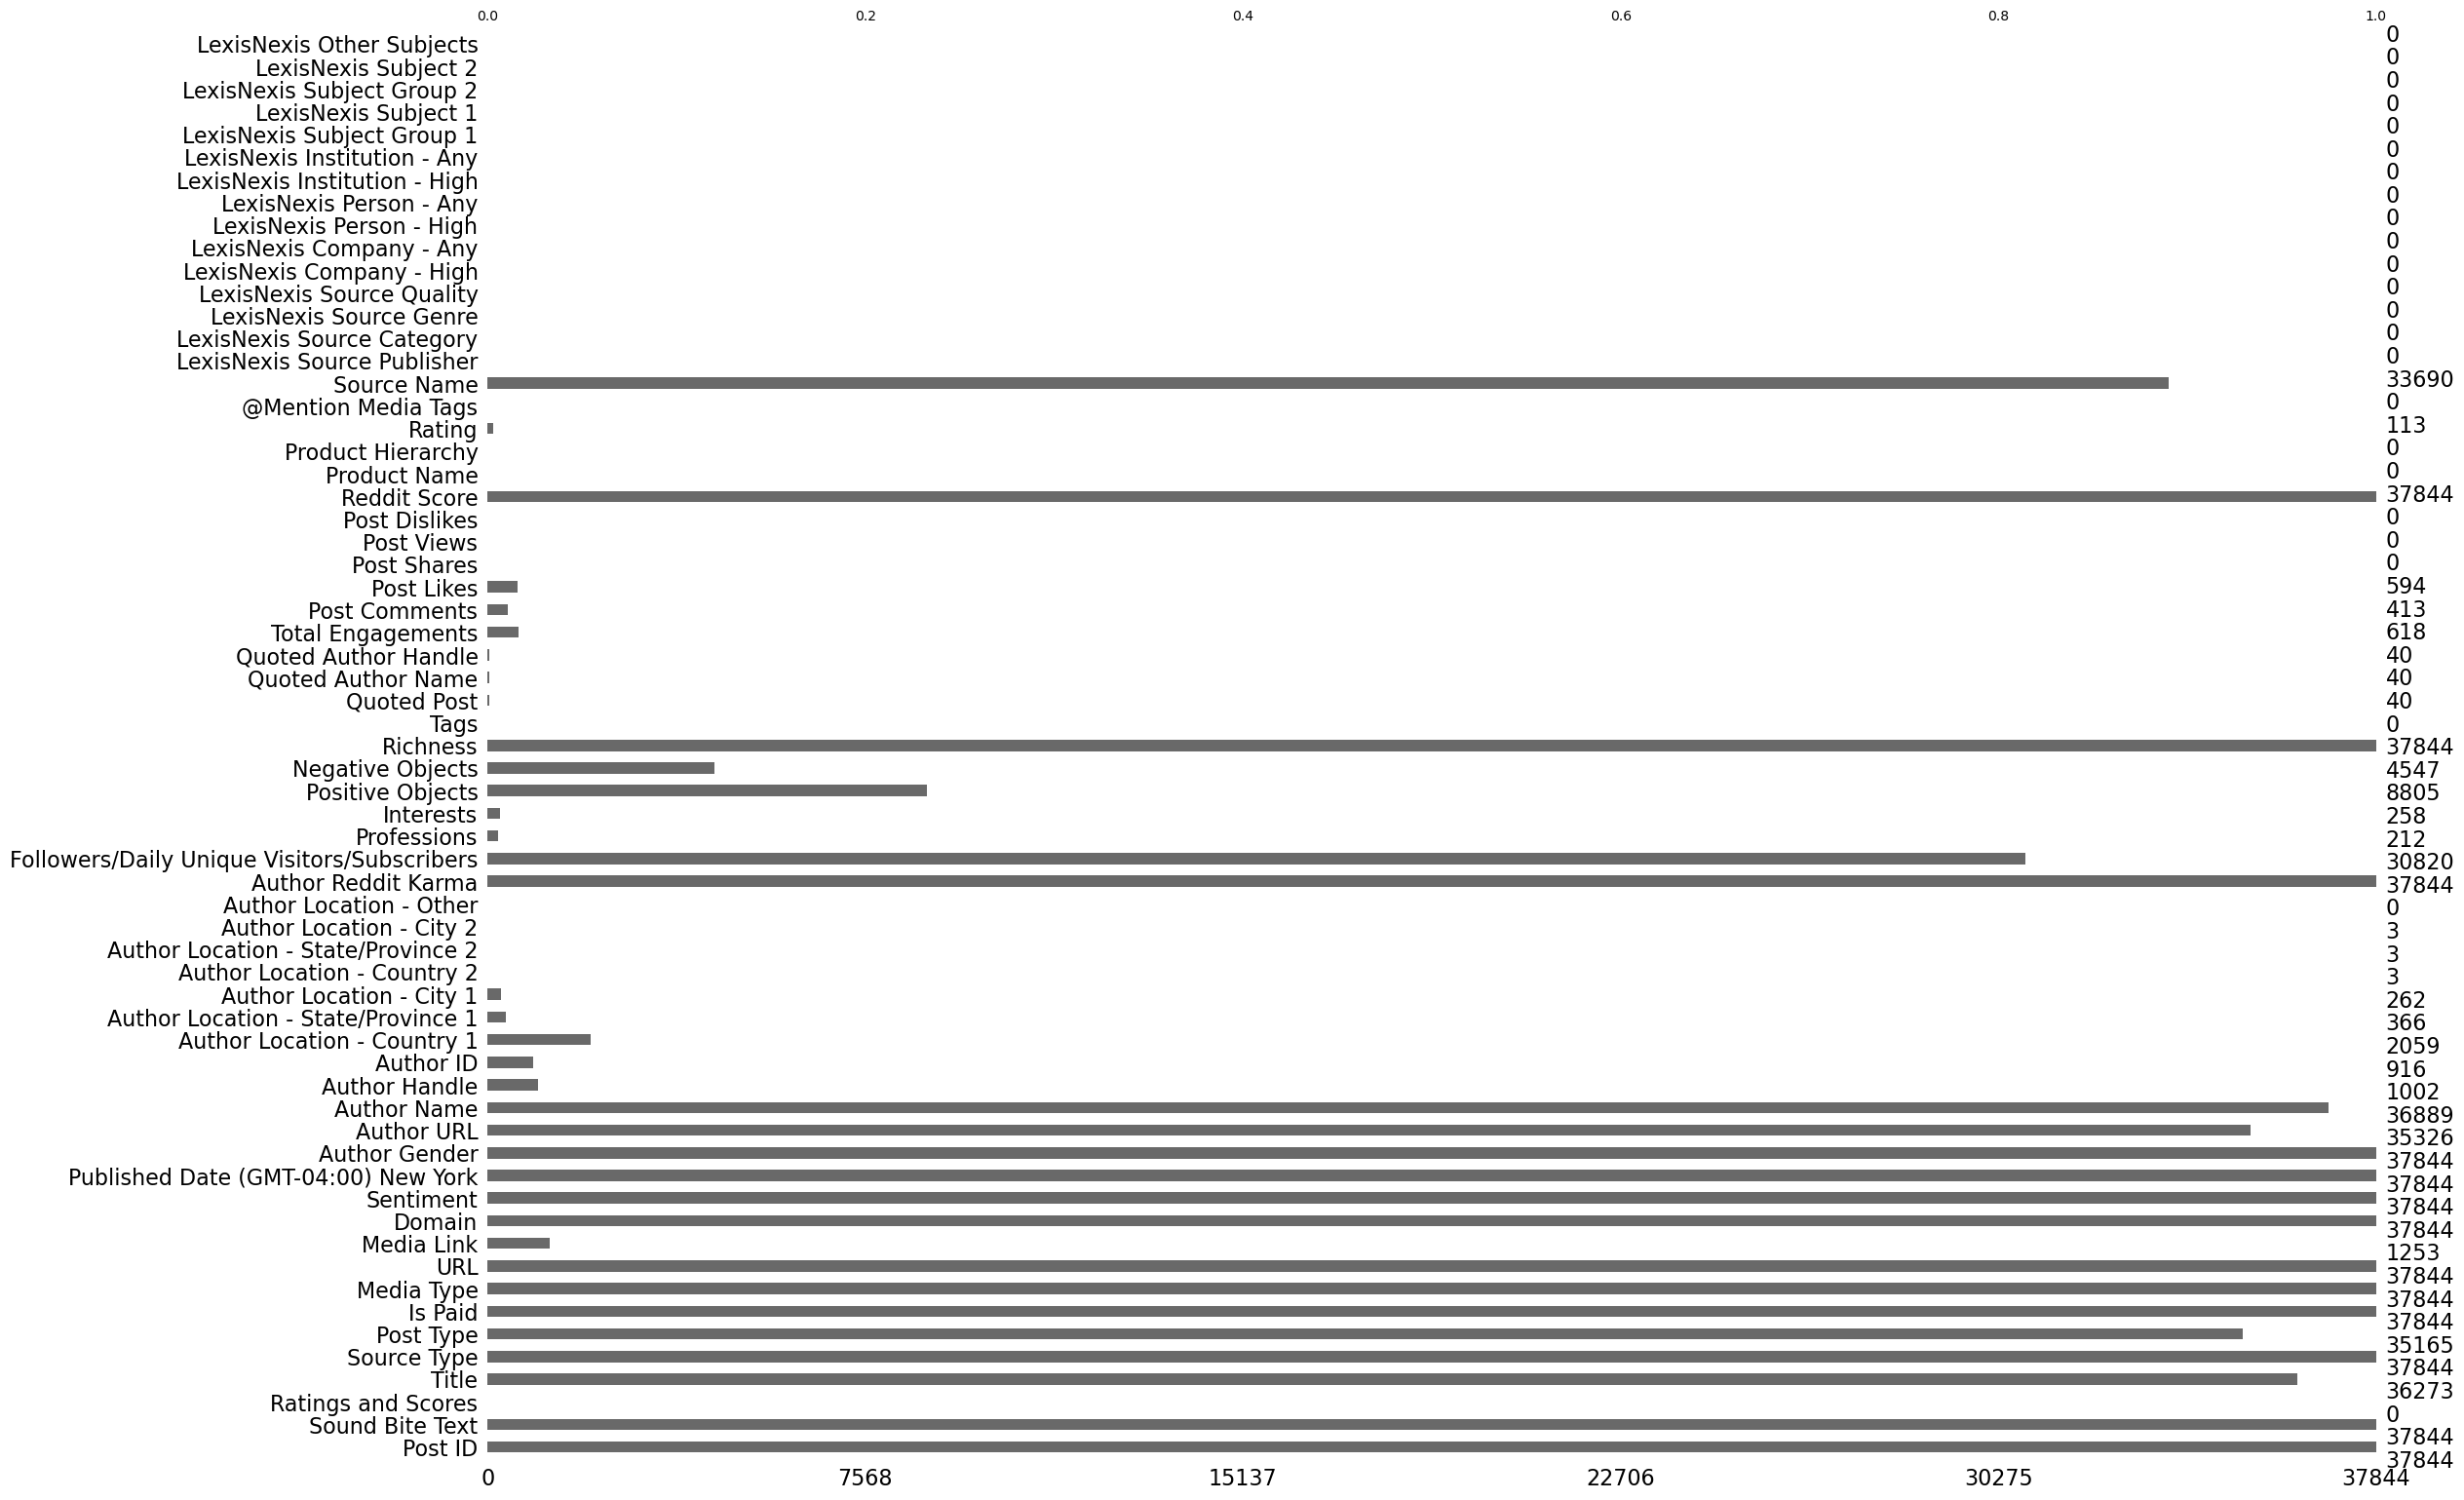

In [14]:
msno.bar(df)

In [15]:
import string
df = df[df['Sound Bite Text'].notnull()] #Remove null values
#Convert to lower case
df['Sound Bite Text'] = df['Sound Bite Text'].str.lower()
df['Sound Bite Text'] = df['Sound Bite Text'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

# Remove stop words
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    tokens = text.split()  # Tokenize the text
    filtered_tokens = [word for word in tokens if word.lower() not in stop_words]  # Remove stopwords
    return ' '.join(filtered_tokens)
df['Sound Bite Text'] = df['Sound Bite Text'].apply(remove_stopwords)
df

Post ID                                    Sound Bite Text  \
0       BRDRDT2-t1_imq98sr  numbers great estimated a1c 7ish doesnt care s...   
1       BRDRDT2-t1_impbcf4  tried little side effects help insulin resista...   
2      1565738759353602048  ran characters youtuberwgl2pdhqim ill also say...   
3        17944607459251789  lunch ate 1030am 1 unit novolog insulin via pu...   
4       BRDRDT2-t1_imq8h9m  also like soak hot tub potential exists lowere...   
...                    ...                                                ...   
37839   BRDRDT2-t1_imokb3b  push game changer opinion course comes issues ...   
37840   BRDRDT2-t1_imn2fob  mom learned inject 10 year old self oranges pe...   
37841   BRDRDT2-t1_imod0qi  spoke rep abbott rep told yet plans update fre...   
37842    17865491111775314  it’s 25 weeks since started i’m feeling better...   
37843   BRDRDT2-t1_imohltu  first endo told paraphrasing everything exactl...   

       Ratings and Scores                                              Title  \
0                     NaN  Have you been denied a second/third pump? Feel...   
1                     NaN                                          Metformin   
2                     NaN                                                NaN   
3                     NaN                                                NaN   
4                     NaN                   No bath salts, bath oils, soaks?   
...                   ...                                                ...   
37839                 NaN  If you were magically cured of type I diabetes...   
37840                 NaN                A question for the older Diabetics.   
37841                 NaN                           Apple IOS 16 public beta   
37842                 NaN                                                NaN   
37843                 NaN                A question for the older Diabetics.   

      Source Type             Post Type Is Paid Media Type  \
0          Forums  Replies and Comments      No   No Media   
1          Forums  Replies and Comments      No   No Media   
2         Twitter  Replies and Comments      No       Link   
3       Instagram              Original      No      Image   
4          Forums  Replies and Comments      No   No Media   
...           ...                   ...     ...        ...   
37839      Forums  Replies and Comments      No   No Media   
37840      Forums  Replies and Comments      No   No Media   
37841      Forums  Replies and Comments      No   No Media   
37842   Instagram              Original      No   No Media   
37843      Forums  Replies and Comments      No   No Media   

                                                     URL  \
0      https://www.reddit.com/r/diabetes_t1/comments/...   
1      https://www.reddit.com/r/diabetes_t1/comments/...   
2      http://twitter.com/bromid/statuses/15657387593...   
3               https://www.instagram.com/p/Ch-gqL-Onqk/   
4      https://www.reddit.com/r/diabetes/comments/x3e...   
...                                                  ...   
37839  https://www.reddit.com/r/diabetes_t1/comments/...   
37840  https://www.reddit.com/r/diabetes_t1/comments/...   
37841  https://www.reddit.com/r/Freestylelibre/commen...   
37842        https://www.instagram.com/reel/Ch7ctN_ge5r/   
37843  https://www.reddit.com/r/diabetes_t1/comments/...   

                                              Media Link  ...  \
0                                                    NaN  ...   
1                                                    NaN  ...   
2                                                    NaN  ...   
3      https://scontent-iad3-1.cdninstagram.com/v/t51...  ...   
4                                                    NaN  ...   
...                                                  ...  ...   
37839                                                NaN  ...   
37840                                                NaN  ...   
37841                             

In [19]:
def remove_punc(text):
    punc_pattern = r'[^\w\s]'
    return re.sub(punc_pattern, '', text)

df['Sound Bite Text'] = df['Sound Bite Text'].apply(remove_punc)
df

Post ID                                    Sound Bite Text  \
0       BRDRDT2-t1_imq98sr  My numbers are great now Estimated a1c of 7ish...   
1       BRDRDT2-t1_impbcf4  I tried it for a little while No side effects ...   
2      1565738759353602048  i ran out of characters youtubeRWgl2PDhQiM ill...   
3        17944607459251789  MY lunch Ate at 1030am \n1 unit NovoLog insuli...   
4       BRDRDT2-t1_imq8h9m  This is also because like a soak in a hot tub ...   
...                    ...                                                ...   
37839   BRDRDT2-t1_imokb3b  Push for it its a game changer in my opinion O...   
37840   BRDRDT2-t1_imn2fob  My mom learned to inject my 10 year old self o...   
37841   BRDRDT2-t1_imod0qi  I just spoke with a rep from Abbott The rep to...   
37842    17865491111775314  Its been 25 weeks since I started and Im feeli...   
37843   BRDRDT2-t1_imohltu  My first endo told me paraphrasing If you do e...   

       Ratings and Scores                                              Title  \
0                     NaN  Have you been denied a second/third pump? Feel...   
1                     NaN                                          Metformin   
2                     NaN                                                NaN   
3                     NaN                                                NaN   
4                     NaN                   No bath salts, bath oils, soaks?   
...                   ...                                                ...   
37839                 NaN  If you were magically cured of type I diabetes...   
37840                 NaN                A question for the older Diabetics.   
37841                 NaN                           Apple IOS 16 public beta   
37842                 NaN                                                NaN   
37843                 NaN                A question for the older Diabetics.   

      Source Type             Post Type Is Paid Media Type  \
0          Forums  Replies and Comments      No   No Media   
1          Forums  Replies and Comments      No   No Media   
2         Twitter  Replies and Comments      No       Link   
3       Instagram              Original      No      Image   
4          Forums  Replies and Comments      No   No Media   
...           ...                   ...     ...        ...   
37839      Forums  Replies and Comments      No   No Media   
37840      Forums  Replies and Comments      No   No Media   
37841      Forums  Replies and Comments      No   No Media   
37842   Instagram              Original      No   No Media   
37843      Forums  Replies and Comments      No   No Media   

                                                     URL  \
0      https://www.reddit.com/r/diabetes_t1/comments/...   
1      https://www.reddit.com/r/diabetes_t1/comments/...   
2      http://twitter.com/bromid/statuses/15657387593...   
3               https://www.instagram.com/p/Ch-gqL-Onqk/   
4      https://www.reddit.com/r/diabetes/comments/x3e...   
...                                                  ...   
37839  https://www.reddit.com/r/diabetes_t1/comments/...   
37840  https://www.reddit.com/r/diabetes_t1/comments/...   
37841  https://www.reddit.com/r/Freestylelibre/commen...   
37842        https://www.instagram.com/reel/Ch7ctN_ge5r/   
37843  https://www.reddit.com/r/diabetes_t1/comments/...   

                                              Media Link  ...  \
0                                                    NaN  ...   
1                                                    NaN  ...   
2                                                    NaN  ...   
3      https://scontent-iad3-1.cdninstagram.com/v/t51...  ...   
4                                                    NaN  ...   
...                                                  ...  ...   
37839                                                NaN  ...   
37840                                                NaN  ...   
37841                             

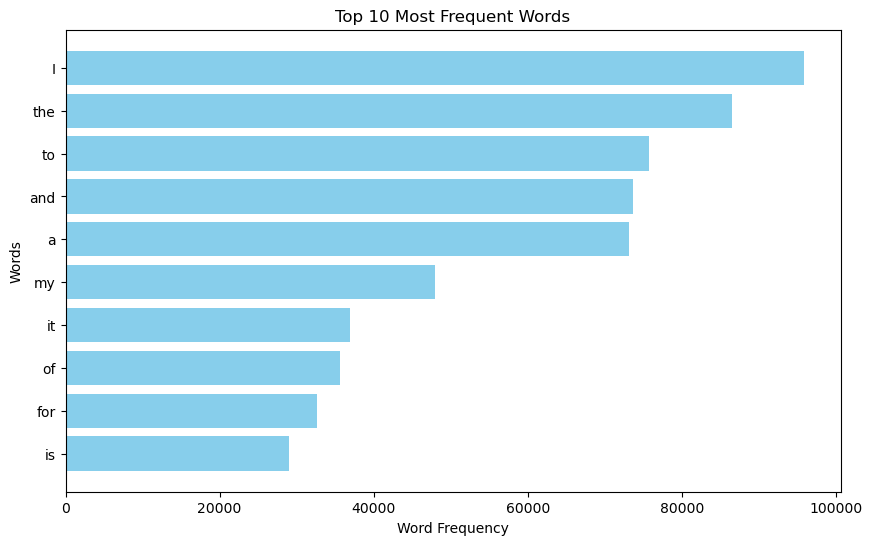

In [20]:
from collections import Counter

# Concatenate all the bites into a single string
all_narratives = ' '.join(df['Sound Bite Text'])

# Tokenize the text and count word frequencies
word_counts = Counter(all_narratives.split())

# Convert the word counts into a list of tuples for sorting
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# Extract the top N words and their counts
top_words = [word for word, count in sorted_word_counts[:10]]
top_counts = [count for word, count in sorted_word_counts[:10]]

# Create a horizontal bar chart
plt.figure(figsize=(10, 6))
plt.barh(top_words, top_counts, color='skyblue')
plt.xlabel('Word Frequency')
plt.ylabel('Words')
plt.title('Top 10 Most Frequent Words')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest frequency on top
plt.show()


In [21]:
sorted_word_counts

[('I', 95820),
 ('the', 86539),
 ('to', 75805),
 ('and', 73640),
 ('a', 73152),
 ('my', 47939),
 ('it', 36947),
 ('of', 35626),
 ('for', 32694),
 ('is', 28993),
 ('that', 27162),
 ('have', 25220),
 ('in', 25205),
 ('with', 25093),
 ('on', 23677),
 ('you', 23649),
 ('but', 19452),
 ('was', 18304),
 ('me', 17043),
 ('CGM', 17006),
 ('Dexcom', 15190),
 ('so', 13933),
 ('Im', 13880),
 ('be', 13496),
 ('your', 12640),
 ('not', 12538),
 ('or', 12476),
 ('as', 12202),
 ('if', 11343),
 ('can', 11114),
 ('this', 11085),
 ('at', 10913),
 ('pump', 10624),
 ('get', 10511),
 ('are', 10472),
 ('just', 10096),
 ('had', 9573),
 ('about', 9284),
 ('blood', 9219),
 ('insulin', 9149),
 ('its', 8851),
 ('when', 8665),
 ('like', 8591),
 ('dexcom', 8553),
 ('glucose', 8432),
 ('an', 8312),
 ('been', 8045),
 ('from', 8044),
 ('Ive', 7912),
 ('out', 7835),
 ('up', 7667),
 ('they', 7616),
 ('do', 7476),
 ('use', 7400),
 ('dont', 7274),
 ('sugar', 7133),
 ('time', 7054),
 ('more', 7024),
 ('The', 6961),
 ('will

In [22]:
#We can remove some frequently occuring words like is an example but it is also helping set the context

frequent_words = ['im', 'ive']
def remove_frequent_words(text):
    # Split the tweet into words
    words = text.split()
    # Remove frequent words
    words = [word for word in words if word.lower() not in frequent_words and word.lower() not in stop_words]
    # Join the remaining words back into a string
    preprocessed_text = ' '.join(words)
    return preprocessed_text

# Apply the preprocess_text_column function to the text column and store the result in a new column
df['Sound Bite Text'] = df['Sound Bite Text'].apply(remove_frequent_words)

In [23]:
# Tokenize and preprocess the text data
all_narratives = ' '.join(df['Sound Bite Text'])
words = word_tokenize(all_narratives)
words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]

# Now 'words' contains the preprocessed text data without stopwords

# Generate bigrams and trigrams
bigram_list = list(bigrams(words))
trigram_list = list(trigrams(words))

# Calculate frequencies of bigrams and trigrams
bigram_freq = FreqDist(bigram_list)
trigram_freq = FreqDist(trigram_list)

# Print most common bigrams and trigrams
print("Top 10 most common bigrams:")
print(bigram_freq.most_common(10))

print("\nTop 10 most common trigrams:")
print(trigram_freq.most_common(10))

Top 10 most common bigrams:
[(('blood', 'sugar'), 5616), (('freestyle', 'libre'), 4842), (('continuous', 'glucose'), 3826), (('glucose', 'monitor'), 2996), (('insulin', 'pump'), 1616), (('pump', 'cgm'), 1498), (('blood', 'glucose'), 1371), (('blood', 'sugars'), 1012), (('glucose', 'monitoring'), 998), (('dexcom', 'cgm'), 933)]

Top 10 most common trigrams:
[(('continuous', 'glucose', 'monitor'), 2615), (('continuous', 'glucose', 'monitoring'), 764), (('blood', 'sugar', 'levels'), 492), (('using', 'freestyle', 'libre'), 392), (('continuous', 'glucose', 'monitors'), 390), (('use', 'freestyle', 'libre'), 378), (('glucose', 'monitor', 'cgm'), 367), (('insulin', 'pump', 'cgm'), 319), (('cgm', 'continuous', 'glucose'), 310), (('low', 'blood', 'sugar'), 304)]


In [24]:
# Tokenize the text
df['Tokens'] = df['Sound Bite Text'].apply(lambda x: word_tokenize(x))

# Lemmatize words
lemmatizer = WordNetLemmatizer()
df['Lemmatized'] = df['Tokens'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x])

# Display the preprocessed tokens
print(df['Tokens'].head())



0    [numbers, great, Estimated, a1c, 7ish, doesnt,...
1    [tried, little, side, effects, help, insulin, ...
2    [ran, characters, youtubeRWgl2PDhQiM, ill, als...
3    [lunch, Ate, 1030am, 1, unit, NovoLog, insulin...
4    [also, like, soak, hot, tub, potential, exists...
Name: Tokens, dtype: object


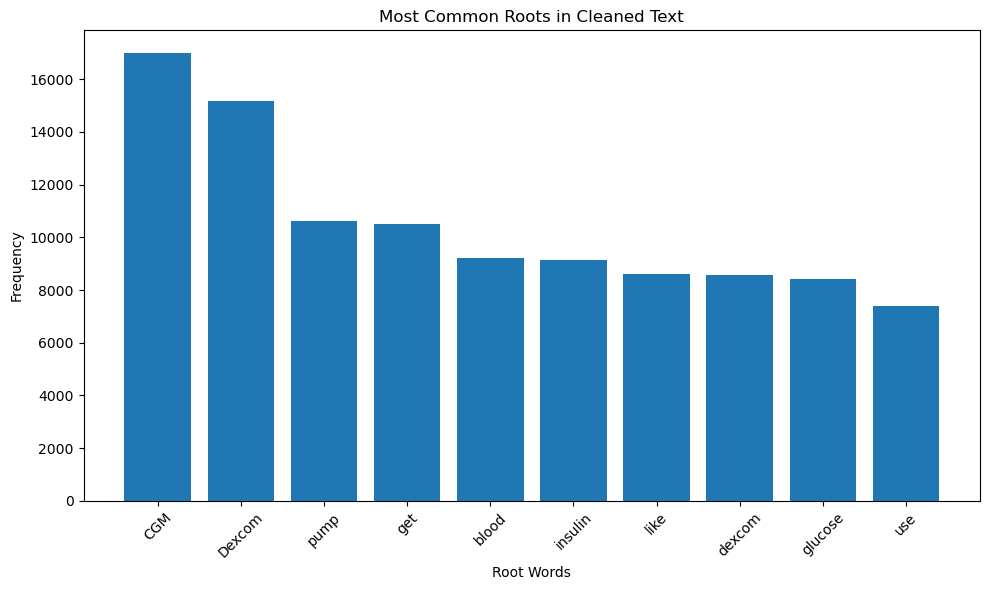

[('CGM', 17006), ('Dexcom', 15190), ('pump', 10624), ('get', 10511), ('blood', 9219), ('insulin', 9149), ('like', 8591), ('dexcom', 8553), ('glucose', 8432), ('use', 7400)]


In [25]:
cleaned_words_stemmed = [stem for stems_list in df['Tokens'] for stem in stems_list]

# Use Counter to count the frequency of each root
word_freq = Counter(cleaned_words_stemmed)

# Get the most common roots
most_common_roots = word_freq.most_common(10)  

# Extract the roots and their frequencies for plotting
roots, frequencies = zip(*most_common_roots)

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(roots, frequencies)
plt.xlabel('Root Words')
plt.ylabel('Frequency')
plt.title('Most Common Roots in Cleaned Text')
plt.xticks(rotation=45)
plt.tight_layout()

# Show the plot
plt.show()

print(most_common_roots)

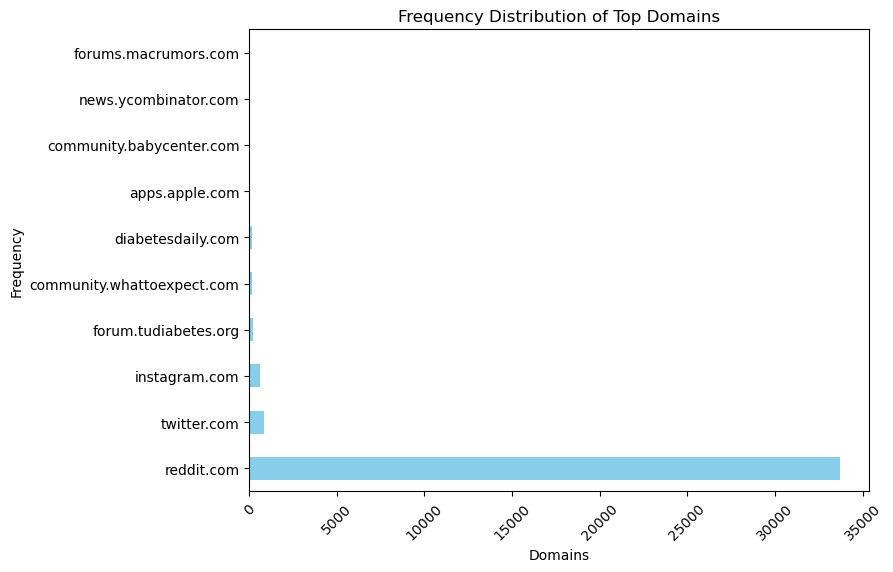

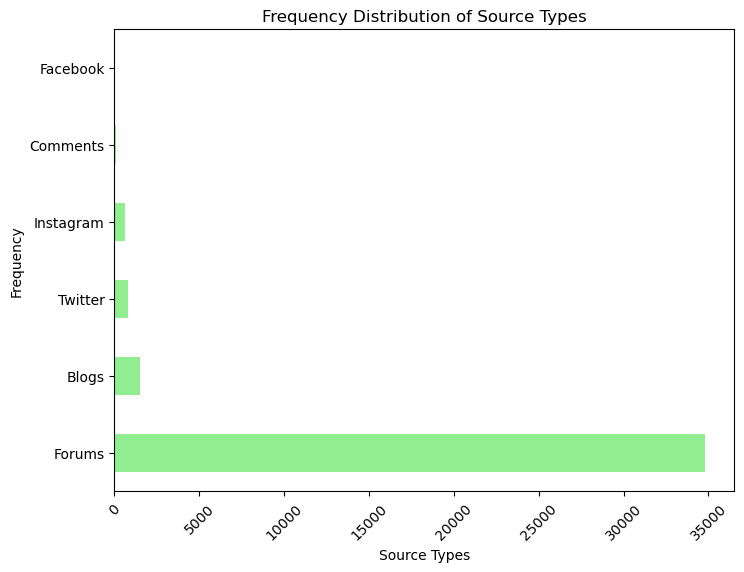

In [26]:
# Frequency distribution of Domain

top_domains= df['Domain'].value_counts().nlargest(10).index.tolist()
df_filtered = df[df['Domain'].isin(top_domains)]
domain_counts_filtered = df_filtered['Domain'].value_counts()

# Plotting domain frequency
plt.figure(figsize=(8, 6))
domain_counts_filtered.plot(kind='barh', color='skyblue')
plt.title('Frequency Distribution of Top Domains')
plt.xlabel('Domains')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Frequency distribution of Source Type
source_type_counts = df['Source Type'].value_counts()

# Plotting source type frequency
plt.figure(figsize=(8, 6))
source_type_counts.plot(kind='barh', color='lightgreen')
plt.title('Frequency Distribution of Source Types')
plt.xlabel('Source Types')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

# Crosstabulation (frequency counts) between Domain and Source Type
crosstab = pd.crosstab(df['Domain'], df['Source Type'])


Top Authors:
Author Name
melancholalia          218
stinky_harriet         212
scissus1               154
Rockitnonstop          150
Run-And_Gun            139
Jonny_Icon             138
diabetesjunkie         112
KokoPuff12             104
invalid@example.com    101
Makeupanopinion         96
Name: count, dtype: int64


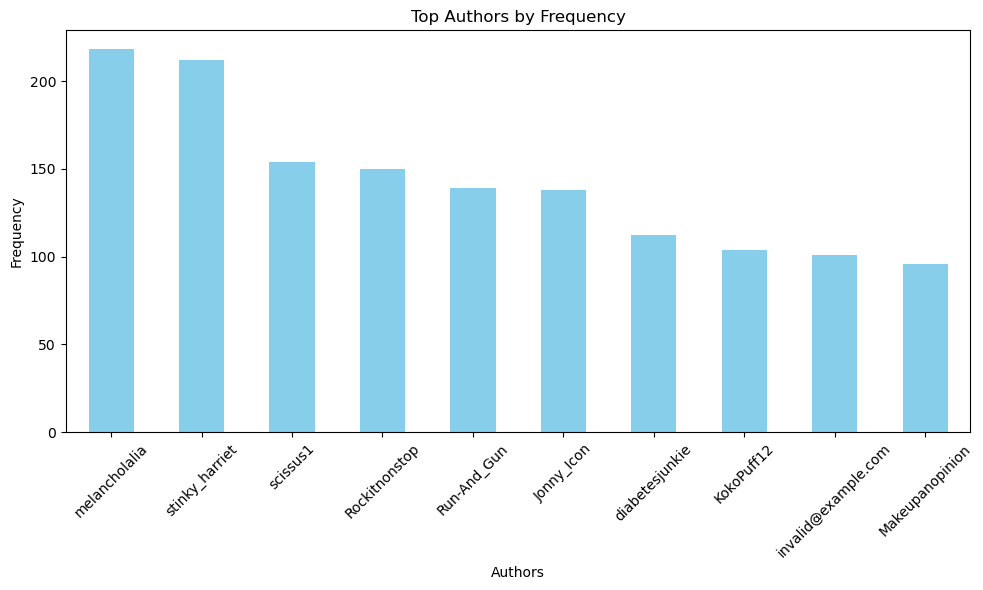

In [27]:

# Get the top authors
top_authors = df['Author Name'].value_counts().nlargest(10)  

# Display the top authors and their frequencies
print("Top Authors:")
print(top_authors)

# Plotting the top authors
plt.figure(figsize=(10, 6))
top_authors.plot(kind='bar', color='skyblue')
plt.title('Top Authors by Frequency')
plt.xlabel('Authors')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [37]:
df['Published Date (GMT-04:00) New York']
df['Published Date'] = pd.to_datetime(df['Published Date (GMT-04:00) New York'])
df['Published Date']

/var/folders/pb/hwd0xd_n2js06c_tr2qwq0840000gn/T/ipykernel_8879/3065683574.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Published Date'] = pd.to_datetime(df['Published Date (GMT-04:00) New York'])


0       2022-09-01 19:41:36
1       2022-09-01 15:53:47
2       2022-09-02 12:29:44
3       2022-09-01 14:20:21
4       2022-09-01 19:35:52
                ...        
37839   2022-09-01 13:00:50
37840   2022-09-01 06:07:02
37841   2022-09-01 12:14:34
37842   2022-08-31 13:43:59
37843   2022-09-01 12:43:40
Name: Published Date, Length: 37844, dtype: datetime64[ns]

The minimum date is: 2021-03-02 14:25:31
The maximum date is: 2022-09-02 13:16:59


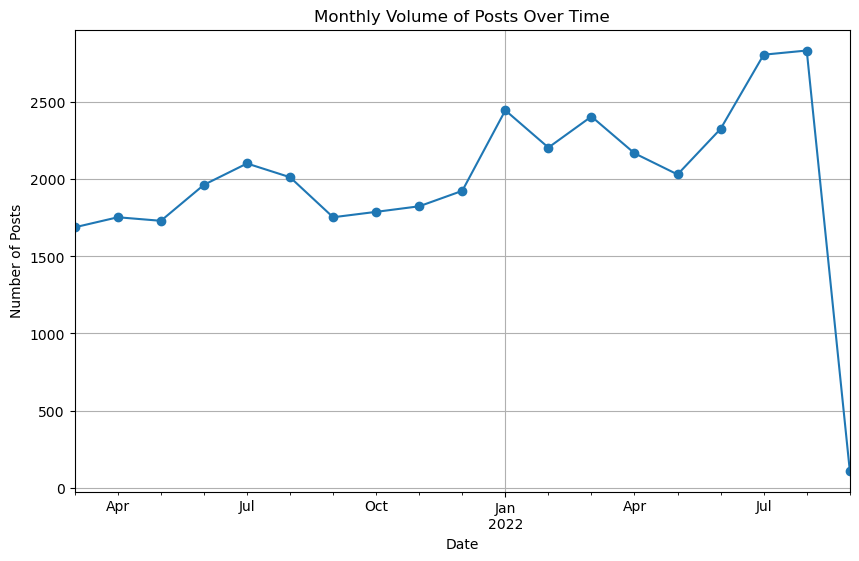

"\n# Sentiment/Engagement Metrics Over Time (Likes and Shares)\nengagement_metrics = df.groupby(df['Published Date'].dt.to_period('M'))[['Likes', 'Shares']].sum()\n\nplt.figure(figsize=(10, 6))\nplt.plot(engagement_metrics.index.to_timestamp(), engagement_metrics['Likes'], label='Likes', marker='o')\nplt.plot(engagement_metrics.index.to_timestamp(), engagement_metrics['Shares'], label='Shares', marker='o')\nplt.title('Engagement Metrics Over Time')\nplt.xlabel('Date')\nplt.ylabel('Count')\nplt.legend()\nplt.grid(True)\nplt.show()\n\n"

In [45]:


minimum_date = df['Published Date'].min()
maximum_date = df['Published Date'].max()

print(f"The minimum date is: {minimum_date}")
print(f"The maximum date is: {maximum_date}")


# Volume of Posts Over Time
plt.figure(figsize=(10, 6))
df.resample('M', on='Published Date').size().plot(marker='o')
plt.title('Monthly Volume of Posts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Posts')
plt.grid(True)
plt.show()


'''
# Sentiment/Engagement Metrics Over Time (Likes and Shares)
engagement_metrics = df.groupby(df['Published Date'].dt.to_period('M'))[['Likes', 'Shares']].sum()

plt.figure(figsize=(10, 6))
plt.plot(engagement_metrics.index.to_timestamp(), engagement_metrics['Likes'], label='Likes', marker='o')
plt.plot(engagement_metrics.index.to_timestamp(), engagement_metrics['Shares'], label='Shares', marker='o')
plt.title('Engagement Metrics Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

'''

In [48]:
post_counts_monthly = df.resample('M', on='Published Date').size()
post_counts_dict = {f"{date.year}-{date.strftime('%B')}": count for date, count in post_counts_monthly.items()}
print(post_counts_dict)

{'2021-March': 1687, '2021-April': 1752, '2021-May': 1729, '2021-June': 1962, '2021-July': 2100, '2021-August': 2011, '2021-September': 1752, '2021-October': 1787, '2021-November': 1823, '2021-December': 1923, '2022-January': 2444, '2022-February': 2203, '2022-March': 2404, '2022-April': 2166, '2022-May': 2029, '2022-June': 2324, '2022-July': 2804, '2022-August': 2831, '2022-September': 113}


In [53]:
df['Sentiment'].unique()

array(['Neutrals', 'Positives', 'Mixed', 'Negatives'], dtype=object)

In [63]:
neutral_sentiments = df[df['Sentiment'] == 'Neutrals']['Sound Bite Text']
positive_sentiments = df[df['Sentiment'] == 'Positives']['Sound Bite Text']
negative_sentiments = df[df['Sentiment'] == 'Negatives']['Sound Bite Text']
mixed_sentiments = df[df['Sentiment'] == 'Mixed']['Sound Bite Text']


In [73]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize the text data
vectorizer = CountVectorizer(max_features=1000, lowercase=True)
X = vectorizer.fit_transform(df['Sound Bite Text'])

# Fit an LDA model
num_topics = 10
lda = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda.fit(X)

# Function to display top words and their probabilities in each topic
def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        words_prob = [(feature_names[i], round(topic[i], 4)) for i in topic.argsort()[:-num_top_words - 1:-1]]
        print(words_prob)
        print()

# Display top words and their probabilities in each topic
num_top_words = 20
feature_names = vectorizer.get_feature_names()
display_topics(lda, feature_names, num_top_words)


Topic 1:
[('dexcom', 4421.5223), ('low', 3360.4291), ('night', 1528.9797), ('time', 1462.5293), ('get', 1334.979), ('high', 1217.3239), ('lows', 1121.0271), ('hours', 1106.3832), ('go', 1105.2164), ('cgm', 971.5641), ('like', 959.6292), ('sensor', 923.3858), ('dont', 888.9518), ('going', 781.0271), ('usually', 772.053), ('sleep', 771.0772), ('minutes', 736.2692), ('days', 733.0123), ('bg', 729.5899), ('every', 699.2696)]

Topic 2:
[('libre', 5843.5834), ('dexcom', 5789.2833), ('freestyle', 3478.5449), ('app', 3450.3769), ('sensor', 2734.9395), ('phone', 2567.7407), ('use', 2398.3884), ('g6', 1886.2491), ('using', 1338.5305), ('sensors', 1228.9637), ('one', 1211.5637), ('get', 1004.0094), ('transmitter', 941.2281), ('back', 911.8322), ('also', 903.0991), ('watch', 882.5741), ('new', 868.8872), ('work', 796.1149), ('like', 744.4395), ('used', 665.7627)]

Topic 3:
[('years', 4411.8671), ('pump', 4316.5649), ('cgm', 3346.5739), ('dexcom', 3163.3905), ('control', 2178.954), ('got', 2114.733

/Users/faraz/opt/anaconda3/envs/spyder-env/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [107]:
X = df['Sound Bite Text']
tf_vectorizer = CountVectorizer(max_df=0.95,
                                min_df=2,
                                stop_words='english')
tf = tf_vectorizer.fit_transform(df['Sound Bite Text'])
num_topics = 6
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=num_topics, random_state=0)
lda.fit(tf)


LatentDirichletAllocation(n_components=6, random_state=0)

In [108]:
import numpy as np
topic_word_distributions = np.array([row / row.sum() for row in lda.components_])
num_top_words = 15

def print_top_words(topic_word_distributions, num_top_words, vectorizer):
    vocab = vectorizer.get_feature_names_out()
    num_topics = len(topic_word_distributions)
    print('Displaying the top %d words per topic and their probabilities within the topic...' % num_top_words)
    print()

    for topic_idx in range(num_topics):
        print('[Topic ', topic_idx, ']', sep='')
        sort_indices = np.argsort(-topic_word_distributions[topic_idx])
        for rank in range(num_top_words):
            word_idx = sort_indices[rank]
            print(vocab[word_idx], ':',
                  topic_word_distributions[topic_idx, word_idx])
        print()

print_top_words(topic_word_distributions, num_top_words, tf_vectorizer)


Displaying the top 15 words per topic and their probabilities within the topic...

[Topic 0]
libre : 0.026852537168819652
cgm : 0.020875658442503196
pump : 0.01987501495609216
dexcom : 0.01898265571393076
use : 0.016877177193301677
freestyle : 0.016555636196948005
sensor : 0.011405756775997894
insulin : 0.009848698258631742
dont : 0.008824598044081073
using : 0.00854851017482034
arm : 0.008086533199124783
like : 0.007642088599457718
used : 0.0055707085842856855
day : 0.005423806222502429
time : 0.004789235002683669

[Topic 1]
dexcom : 0.020148159744494985
low : 0.018734430842352053
cgm : 0.017936063640143482
blood : 0.013403636544877784
sugar : 0.012701113408457997
time : 0.010589666766936052
day : 0.009603245955499076
like : 0.009351061681951421
high : 0.009281745661479348
insulin : 0.007682930034833795
hours : 0.007464755549835211
night : 0.007114217941245304
bg : 0.00689390161648779
minutes : 0.006805372994741434
dont : 0.006395203383889316

[Topic 2]
cgm : 0.02891255926043072
pump 

Topic 0:
This topic encompasses discussions about different CGM devices like Libre, Dexcom, and pumps. Users discuss using sensors on their arms, insulin usage, and the frequency of use (day and time).

Topic 1:
This topic revolves around discussions related to blood sugar levels, particularly lows and highs, and managing them. Users talk about different times of the day, like night and day, concerning blood sugar levels and insulin.

Topic 2:
The topic centers on users sharing their personal experiences and knowledge related to CGMs, expressing their thoughts, and discussing their diabetes journey over the years.

Topic 3:
It covers discussions around insurance coverage for CGM-related expenses, including sensors, pumps, and specific brands like Dexcom, Medtronic, and Tandem.

Topic 4:
This topic focuses on various devices and tools used in managing diabetes, such as glucose monitoring tools like Freestyle and Libre, along with smartwatches and apps.

Topic 5:
It includes discussions on the broader context of glucose and blood sugar monitoring, diabetes management, and the health aspects associated with continuous glucose monitoring.

Regarding patient expectations and knowledge gaps with CGMs, these topics reflect a wide array of discussions. Patients are discussing aspects ranging from the technical details of CGM devices (Topic 0 and 4) to managing blood sugar levels (Topics 1 and 5), insurance concerns (Topic 3), and personal experiences with diabetes and CGMs (Topic 2).

Patient expectations could involve aspects related to device usability, accuracy, insurance coverage, and overall impact on diabetes management. Knowledge gaps might include understanding optimal usage times, interpreting device readings, insurance-related confusion, and seeking advice or insights from others about their experiences with CGMs.

This analysis showcases the diverse topics discussed by patients in online forums, indicating the multifaceted aspects of patient expectations and knowledge gaps regarding CGMs. Further exploration and qualitative analysis of these topics could provide deeper insights into patient expectations and identify specific areas where patients may seek more information or support.

In [109]:
def compute_average_num_unique_words(topic_word_distributions, num_top_words, vectorizer, verbose=True):
    vocab = vectorizer.get_feature_names_out()
    num_topics = len(topic_word_distributions)
    average_number_of_unique_top_words = 0
    for topic_idx1 in range(num_topics):
        if verbose:
            print('[Topic ', topic_idx1, ']', sep='')
        
        sort_indices1 = np.argsort(topic_word_distributions[topic_idx1])[::-1]
        num_unique_top_words = 0
        for top_word_idx1 in sort_indices1[:num_top_words]:
            word1 = vocab[top_word_idx1]
            break_ = False
            for topic_idx2 in range(num_topics):
                if topic_idx1 != topic_idx2:
                    sort_indices2 = np.argsort(topic_word_distributions[topic_idx2])[::-1]
                    for top_word_idx2 in sort_indices2[:num_top_words]:
                        word2 = vocab[top_word_idx2]
                        if word1 == word2:
                            break_ = True
                            break
                    if break_:
                        break
            else:
                num_unique_top_words += 1
        if verbose:
            print('Number of unique top words:', num_unique_top_words)
            print()

        average_number_of_unique_top_words += num_unique_top_words
    average_number_of_unique_top_words /= num_topics
    
    if verbose:
        print('Average number of unique top words:', average_number_of_unique_top_words)
    
    return average_number_of_unique_top_words
compute_average_num_unique_words(topic_word_distributions, num_top_words, tf_vectorizer, True)

[Topic 0]
Number of unique top words: 3

[Topic 1]
Number of unique top words: 6

[Topic 2]
Number of unique top words: 7

[Topic 3]
Number of unique top words: 8

[Topic 4]
Number of unique top words: 5

[Topic 5]
Number of unique top words: 7

Average number of unique top words: 6.0


6.0

In [110]:
def log_prob_see_word1_given_see_word2(word1, word2, vectorizer, eps=0.1):
    word1_column_idx = vectorizer.vocabulary_[word1]
    word2_column_idx = vectorizer.vocabulary_[word2]
    documents_with_word1 = (tf[:, word1_column_idx].toarray().flatten() > 0)
    documents_with_word2 = (tf[:, word2_column_idx].toarray().flatten() > 0)
    documents_with_both_word1_and_word2 = documents_with_word1 * documents_with_word2
    return np.log2((documents_with_both_word1_and_word2.sum() + eps) / documents_with_word2.sum())

def compute_average_coherence(topic_word_distributions, num_top_words, vectorizer, verbose=True):
    vocab = vectorizer.get_feature_names_out()
    num_topics = len(topic_word_distributions)
    average_coherence = 0
    for topic_idx in range(num_topics):
        if verbose:
            print('[Topic ', topic_idx, ']', sep='')
        
        sort_indices = np.argsort(topic_word_distributions[topic_idx])[::-1]
        coherence = 0.
        for top_word_idx1 in sort_indices[:num_top_words]:
            word1 = vocab[top_word_idx1]
            for top_word_idx2 in sort_indices[:num_top_words]:
                word2 = vocab[top_word_idx2]
                if top_word_idx1 != top_word_idx2:
                    coherence += log_prob_see_word1_given_see_word2(word1, word2, vectorizer, 0.1)
        
        if verbose:
            print('Coherence:', coherence)
            print()
        average_coherence += coherence
    average_coherence /= num_topics
    if verbose:
        print('Average coherence:', average_coherence)
    return average_coherence
compute_average_coherence(topic_word_distributions, num_top_words, tf_vectorizer, True)

[Topic 0]
Coherence: -528.1986008042157

[Topic 1]
Coherence: -535.0126297892849

[Topic 2]
Coherence: -507.75383392451283

[Topic 3]
Coherence: -590.8620808582691

[Topic 4]
Coherence: -623.7240411128593

[Topic 5]
Coherence: -494.00742485060925

Average coherence: -546.5931018899586


-546.5931018899586

Text(0, 0.5, 'Average coherence')

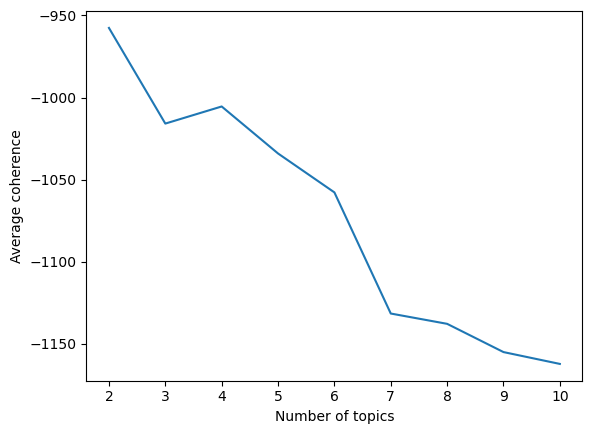

In [84]:
plt.plot(k_values, avg_coherences)
plt.xlabel('Number of topics')
plt.ylabel('Average coherence')

Text(0, 0.5, 'Average number of unique words')

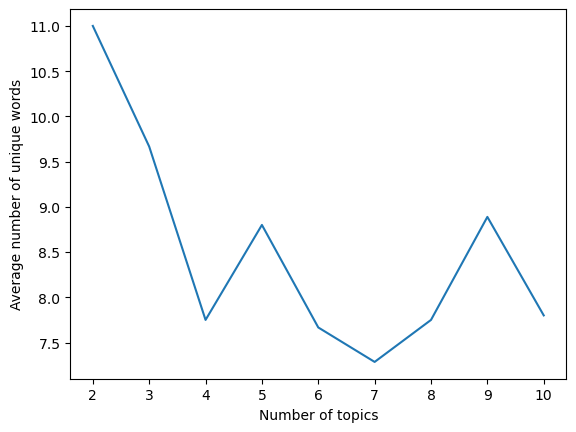

In [85]:
plt.plot(k_values, avg_num_unique_words)
plt.xlabel('Number of topics')
plt.ylabel('Average number of unique words')

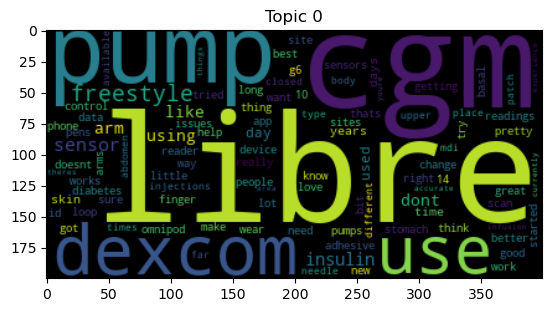

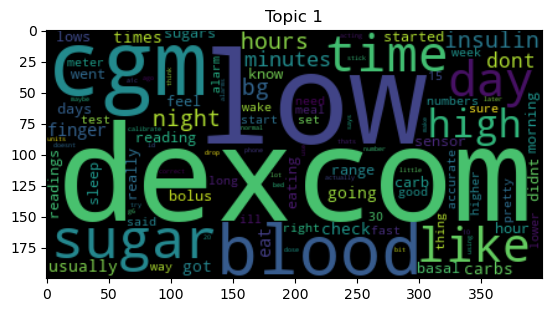

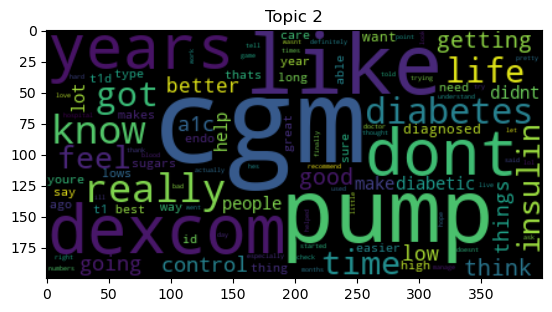

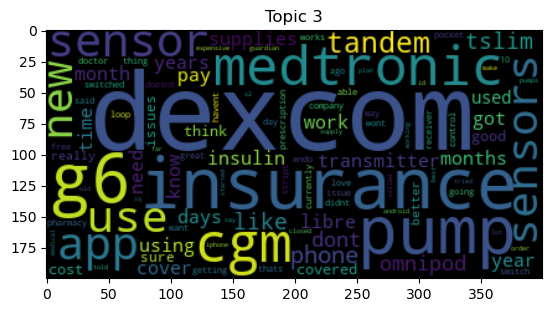

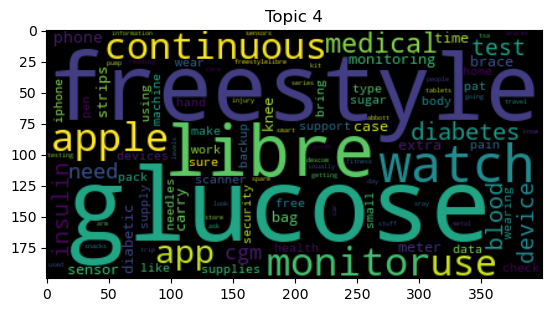

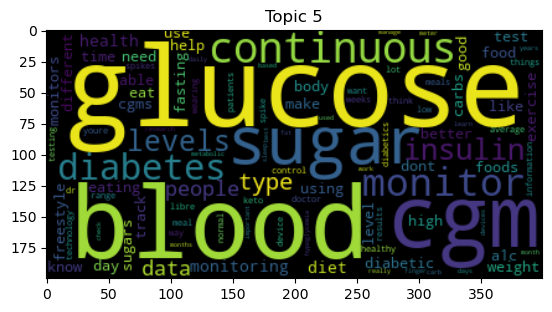

In [111]:
from wordcloud import WordCloud

num_max_word_cloud_words = 100

vocab = tf_vectorizer.get_feature_names_out()
num_topics = len(topic_word_distributions)

for topic_idx in range(num_topics):
    wc = WordCloud(max_words=num_max_word_cloud_words)
    wc.generate_from_frequencies(dict(zip(vocab, topic_word_distributions[topic_idx])))
    plt.figure()
    plt.imshow(wc, interpolation='bilinear')
    plt.title('Topic %d' % topic_idx)

In [121]:
doc_topic_probs = lda.transform(tf)

array([[0.01051226, 0.01059535, 0.76577482, 0.01054045, 0.01046768,
        0.19210945],
       [0.01689079, 0.01681951, 0.01683975, 0.48006694, 0.01672406,
        0.45265894],
       [0.00764488, 0.00761316, 0.36266592, 0.60687264, 0.00758916,
        0.00761424],
       ...,
       [0.01054051, 0.01044941, 0.01048365, 0.77998411, 0.1780695 ,
        0.01047282],
       [0.00374745, 0.00373846, 0.18559839, 0.00374122, 0.00373145,
        0.79944304],
       [0.24987507, 0.27060207, 0.32205772, 0.00494387, 0.00492364,
        0.14759764]])

In [122]:
shape

(37844, 6)

In summary, we have the following set of topics that we intend to visualize over time
- Topic 0: Different CGM devices
- Topic 1: Discussions related to blood sugar levels
- Topic 2: Personal Experience
- Topic 3: Insurance Coverage and CGM Expenses
- Topic 4: Devices and Tools
- Topic 5: Broader aspects of monitoring and personal health


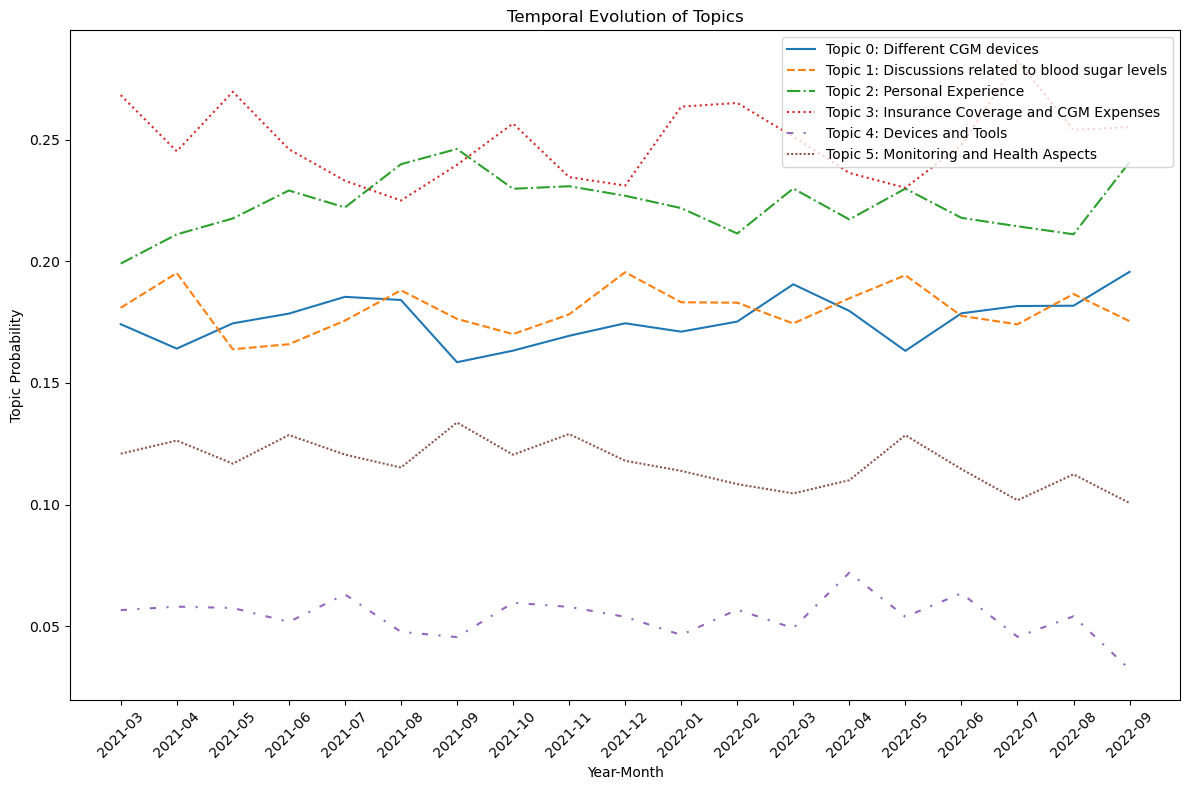

In [150]:
data = pd.DataFrame(doc_topic_probs, columns=[f"Topic_{i}" for i in range(doc_topic_probs.shape[1])])
data['Year_Month'] = df['Published Date'].dt.to_period('M').astype(str)
topic_evolution = data.groupby('Year_Month').mean()

line_styles = ['-', '--', '-.', ':', (0, (3, 5, 1, 5)), (0, (1, 1))]
# Plot temporal evolution for each topic with labels
plt.figure(figsize=(12, 8))
for i in range(6): 
    plt.plot(topic_evolution[f'Topic_{i}'], label=f'Topic {i}: {"Different CGM devices" if i == 0 else "Discussions related to blood sugar levels" if i == 1 else "Personal Experience" if i == 2 else "Insurance Coverage and CGM Expenses" if i == 3 else "Devices and Tools" if i == 4 else "Monitoring and Health Aspects"}', linestyle=line_styles[i])

plt.xlabel('Year-Month')
plt.ylabel('Topic Probability')
plt.title('Temporal Evolution of Topics')
plt.legend(loc='upper right')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


The X-axis in the temporal evolution plot represents the time period. 

The Y-axis represents the probability or prevalence of a particular topic within the discussions during that time interval. Each line in the plot represents the evolution of a specific topic over time. The Y-axis value at a given point for a particular topic indicates the prevalence or likelihood of that topic being discussed during that specific period.

Rising or Falling Trends: An increasing trend for a topic's line indicates a growing prevalence of discussions related to that topic over time. Conversely, a decreasing trend suggests a decline in discussions about that topic.

Spikes or Peaks: Sudden spikes or peaks in a topic's line suggest a sudden surge in discussions related to that topic during a specific time period. This could be due to an event, news, or any other influential factor relevant to the topic.

Consistent Patterns: Consistency or periodic patterns in the lines might indicate recurring discussions or periodic trends in the topic's prevalence.

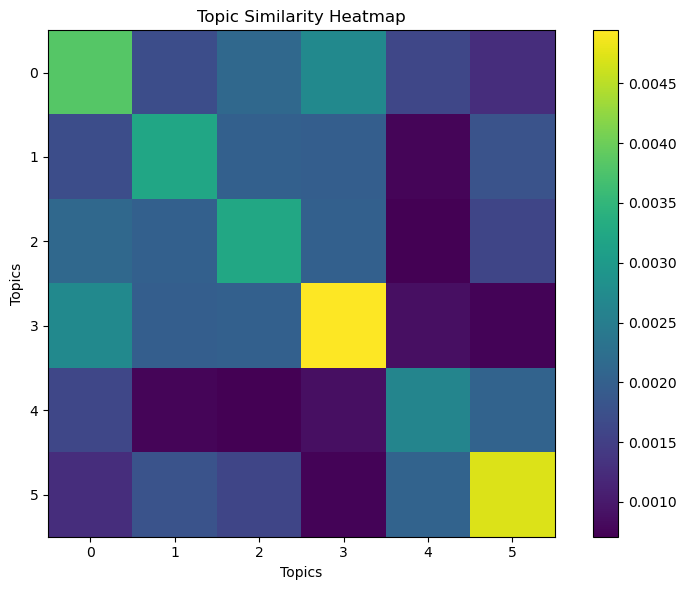

In [162]:
num_topics = len(topic_word_distributions)
topic_similarity = np.zeros((num_topics, num_topics))

for i in range(num_topics):
    for j in range(num_topics):
        topic_similarity[i][j] = np.dot(topic_word_distributions[i], topic_word_distributions[j])
        
# Plot the heatmap
plt.figure(figsize=(8, 6))
plt.imshow(topic_similarity, cmap='viridis', interpolation='nearest')
plt.colorbar()
plt.title('Topic Similarity Heatmap')
plt.xlabel('Topics')
plt.ylabel('Topics')
plt.xticks(np.arange(num_topics))
plt.yticks(np.arange(num_topics))
plt.tight_layout()
plt.show()

In [180]:
#Benefits of GCM and Unmet Needs

analyzer = SentimentIntensityAnalyzer()

def get_sentiment_score(stem_list):
    stemmed_text = ' '.join(stem_list)
    return analyzer.polarity_scores(stemmed_text)['compound']

# Apply sentiment analysis to the 'Stemmed Text' column
df['Sentiment Score'] = df['Tokens'].apply(get_sentiment_score)

# Define the sentiment ranges and assign scores
def assign_sentiment(score):
    if score < -0.5:
        return 1
    elif -0.5 <= score < -0.1:
        return 2
    elif -0.1 <= score < 0.1:
        return 3
    elif 0.1 <= score < 0.5:
        return 4
    else:
        return 5


df['Sentiment Score (1-5)'] = df['Sentiment Score'].apply(assign_sentiment)



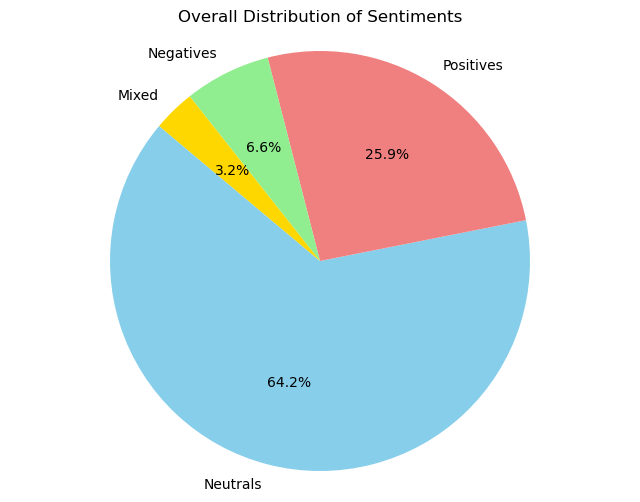

In [194]:
import matplotlib.pyplot as plt

sentiment_counts = df['Sentiment'].value_counts()

labels = sentiment_counts.index
sizes = sentiment_counts.values

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'lightcoral', 'lightgreen', 'gold'])
plt.title('Overall Distribution of Sentiments')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [196]:
#Identifying Specific Specific Words that lead to different sentiments
positive_words = []
negative_words = []
neutral_words = []
mixed_words = []

for index, row in df.iterrows():
    words = row['Lemmatized']  
    sentiment = row['Sentiment'] 
    if sentiment == 'Positives':
        positive_words.extend(words)
    elif sentiment == 'Negatives':
        negative_words.extend(words)
    elif sentiment == 'Neutrals':
        neutral_words.extend(words)
    elif sentiment == 'Mixed':
        mixed_words.extend(words)

positive_words = list(set(positive_words))
negative_words = list(set(negative_words))
neutral_words = list(set(neutral_words))
mixed_words = list(set(mixed_words))



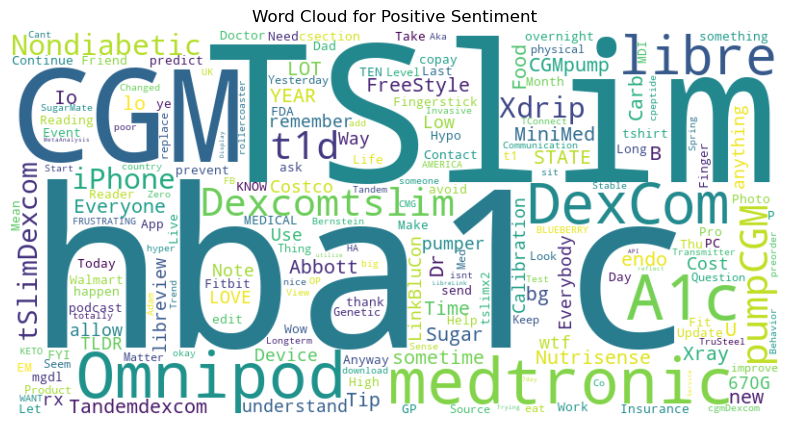

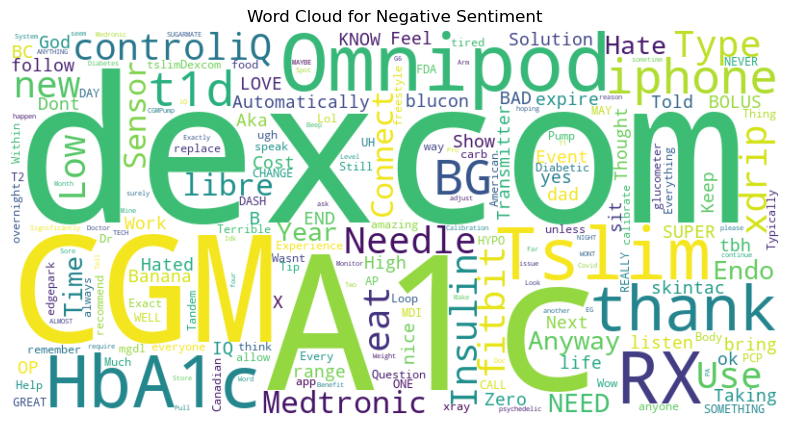

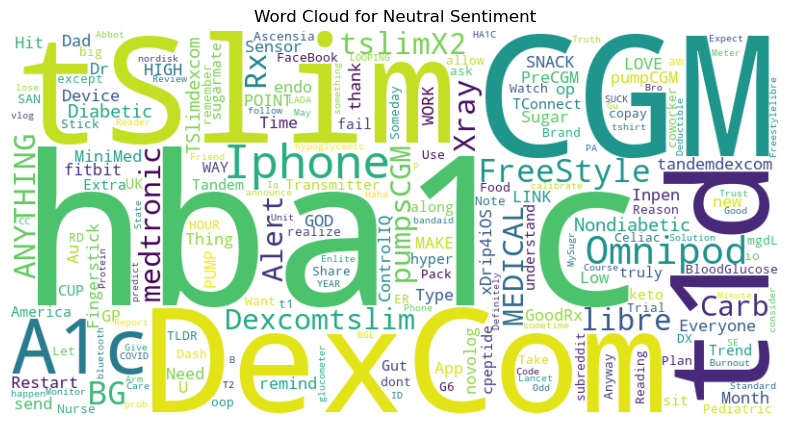

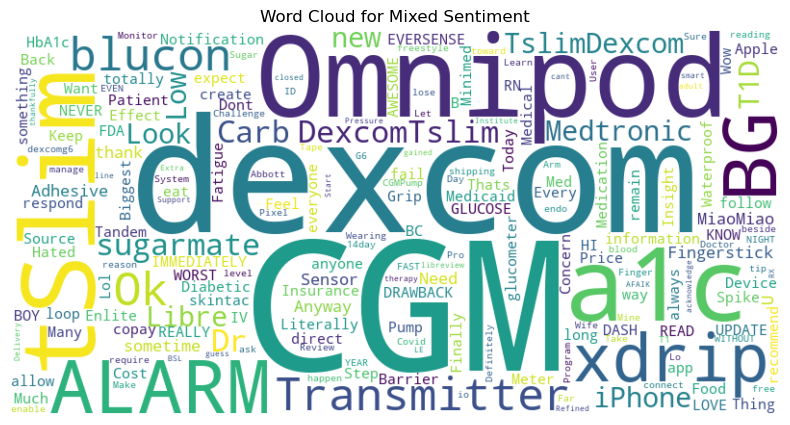

In [197]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# Generate word clouds for different sentiments
def generate_wordcloud(words, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(words))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

generate_wordcloud(positive_words, 'Word Cloud for Positive Sentiment')
generate_wordcloud(negative_words, 'Word Cloud for Negative Sentiment')
generate_wordcloud(neutral_words, 'Word Cloud for Neutral Sentiment')
generate_wordcloud(mixed_words, 'Word Cloud for Mixed Sentiment')

In [202]:
from collections import Counter

def top_words(sentiment_words, sentiment):
    word_counts = Counter(sentiment_words)
    top_words = word_counts.most_common(30)
    print(f"Top 30 words in {sentiment} sentiment:")
    print(top_words)

top_words(positive_words, 'Positive')
top_words(negative_words, 'Negative')
top_words(neutral_words, 'Neutral')
top_words(mixed_words, 'Mixed')


Top 30 words in Positive sentiment:
[('libreview', 1), ('oversees', 1), ('consistantly', 1), ('Delivery', 1), ('Everybody', 1), ('putting', 1), ('named', 1), ('ethic', 1), ('swelling', 1), ('arterial', 1), ('Patreon', 1), ('Trevor', 1), ('Hydrogen', 1), ('childcare', 1), ('UK', 1), ('Drying', 1), ('lessstressed', 1), ('Lexapro', 1), ('blurred', 1), ('customed', 1), ('smart', 1), ('believer', 1), ('closed', 1), ('cgmDexcom', 1), ('httpswwwdiabetesdailycomforumthreadsarmachefromfreestylelibre120782httpswwwdiabetesdailycomforumthreadsarmachefromfreestylelibre120782', 1), ('LibreView12', 1), ('Flixonasenose', 1), ('exercised', 1), ('planning', 1), ('cbd', 1)]
Top 30 words in Negative sentiment:
[('Contains', 1), ('national', 1), ('articulated', 1), ('thankfully', 1), ('payment', 1), ('exposed', 1), ('putting', 1), ('Extra', 1), ('detrimental', 1), ('thanksgiving', 1), ('S22', 1), ('medicine', 1), ('Itll', 1), ('RX', 1), ('fingersticksMDI', 1), ('rash', 1), ('gloom', 1), ('Factual', 1), ('s

In [218]:
#Fitting a Machine Learning Model to the Data
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Step 1: Feature Extraction
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['Sound Bite Text'])

# Step 2: Model Selection (Random Forest Classifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Step 3: Training and Testing
X_train, X_test, y_train, y_test = train_test_split(X, df['Sentiment'], test_size=0.3, random_state=42)
model.fit(X_train, y_train)
accuracy = model.score(X_test, y_test)
print(f"Accuracy: {accuracy}\n")

sound_bites = df['Sound Bite Text'].sample(n=10)

sound_bites_X = vectorizer.transform(sound_bites)
predictions = model.predict(sound_bites_X)

for i, (sound_bites, prediction) in enumerate(zip(sound_bites, predictions)):
    print(f"\nSound Bite Text {i+1}: {sound_bites}")
    print(f"Predicted Sentiment: {prediction}\n")


Accuracy: 0.6626739475074863


Sound Bite Text 1: though See comment httpswwwredditcomrdiabetescommentsmkc1x4opened_a_pack_of_dexcom_g6_sensors_today_and_theygth1txtutm_mediumandroid_apputm_sourcesharecontext3
Predicted Sentiment: Neutrals


Sound Bite Text 2: organize stuff traveling Day day CGM pump dont really carry anything CGM tells need grab snack store vending machine usually stop low b4 starts Edit thing glucose tabs bag always carry like 4 years lol
Predicted Sentiment: Neutrals


Sound Bite Text 3: would say stomach personally never dexcom played jealous would loved BG always crazy ice would say make sure point would potentially get caught pants maybe lower stomach pants would also get adhesive patches dont worry falling sweat
Predicted Sentiment: Neutrals


Sound Bite Text 4: didnt realize regional restrictions would apply wear arms thighs stomach back never issue
Predicted Sentiment: Positives


Sound Bite Text 5: 6 devices wear products use make living T1D easier use Tande

#### Part 2- Product Specific Analysis

In [219]:
dexcom_data = df[df['Sound Bite Text'].str.contains('Dexcom') | df['Lemmatized'].apply(lambda x: 'dexcom' in x)]
#freestyle_data = df[df['Sound Bite Text'].str.contains('Freestyle Libre') | df['Lemmatized'].apply(lambda x: 'freestyle' in x)]
freestyle_data = df[df['Sound Bite Text'].str.contains('Freestyle|Libre', case=False) | df['Lemmatized'].apply(lambda x: 'freestyle' in x or 'libre' in x)]

In [232]:
dexcom_data

Post ID                                    Sound Bite Text  \
0       BRDRDT2-t1_imq98sr  numbers great Estimated a1c 7ish doesnt care s...   
1       BRDRDT2-t1_impbcf4  tried little side effects help insulin resista...   
2      1565738759353602048  ran characters youtubeRWgl2PDhQiM ill also say...   
3        17944607459251789  lunch Ate 1030am 1 unit NovoLog insulin via pu...   
7       BRDRDT2-t1_imrqfpz  Currently impatiently waiting told Canada get ...   
...                    ...                                                ...   
37835   BRDRDT2-t1_imoqcl4  got switched Libre well inconsistent compared ...   
37836   BRDRDT2-t1_imn1a5o  Around day 678 lately dexcom acts weird Random...   
37837   BRDRDT2-t1_imostdg                 reacting one grabs arm near Dexcom   
37838   BRDRDT2-t1_imop9hf  guess mine would attributing light headedness ...   
37840   BRDRDT2-t1_imn2fob  mom learned inject 10 year old self oranges pe...   

       Ratings and Scores                                              Title  \
0                     NaN  Have you been denied a second/third pump? Feel...   
1                     NaN                                          Metformin   
2                     NaN                                                NaN   
3                     NaN                                                NaN   
7                     NaN                                            Libre 3   
...                   ...                                                ...   
37835                 NaN                              Inconsistent readings   
37836                 NaN                                Dexcom Trust Issues   
37837                 NaN  If you were magically cured of type I diabetes...   
37838                 NaN  If you were magically cured of type I diabetes...   
37840                 NaN                A question for the older Diabetics.   

      Source Type             Post Type Is Paid Media Type  \
0          Forums  Replies and Comments      No   No Media   
1          Forums  Replies and Comments      No   No Media   
2         Twitter  Replies and Comments      No       Link   
3       Instagram              Original      No      Image   
7          Forums  Replies and Comments      No   No Media   
...           ...                   ...     ...        ...   
37835      Forums  Replies and Comments      No   No Media   
37836      Forums  Replies and Comments      No   No Media   
37837      Forums  Replies and Comments      No   No Media   
37838      Forums  Replies and Comments      No   No Media   
37840      Forums  Replies and Comments      No   No Media   

                                                     URL  \
0      https://www.reddit.com/r/diabetes_t1/comments/...   
1      https://www.reddit.com/r/diabetes_t1/comments/...   
2      http://twitter.com/bromid/statuses/15657387593...   
3               https://www.instagram.com/p/Ch-gqL-Onqk/   
7      https://www.reddit.com/r/Type1Diabetes/comment...   
...                                                  ...   
37835  https://www.reddit.com/r/diabetes/comments/x2k...   
37836  https://www.reddit.com/r/diabetes_t1/comments/...   
37837  https://www.reddit.com/r/diabetes_t1/comments/...   
37838  https://www.reddit.com/r/diabetes_t1/comments/...   
37840  https://www.reddit.com/r/diabetes_t1/comments/...   

                                              Media Link  ...  \
0                                                    NaN  ...   
1                                                    NaN  ...   
2                                                    NaN  ...   
3      https://scontent-iad3-1.cdninstagram.com/v/t51...  ...   
7                                                    NaN  ...   
...                                                  ...  ...   
37835                                                NaN  ...   
37836                                                NaN  ...   
37837                             

In [233]:
freestyle_data

Post ID                                    Sound Bite Text  \
10     BRDRDT2-t1_imrg3eh  tried get without doctors prescription expensi...   
23     BRDRDT2-t1_imspl4k  Hey man welcome club nobody wants join highly ...   
31     BRDRDT2-t1_imsv1ll  ADHD really worried sensors would constant phy...   
37     BRDRDT2-t1_imp028v    freestyle libre 14 day sensor r libre 3 r thing   
69     BRDRDT2-t1_imphbbf  used freestyle Libre 1 last couple years love ...   
...                   ...                                                ...   
37781   BRDRDT2-t3_x2uc6s  using dexcom g6 friend said freestyle libre 3 ...   
37796  BRDRDT2-t1_imlpgpl  finally take step manage diabetes find best cg...   
37809  BRDRDT2-t1_imlyqzo  Thats weird freestyle libre older omnipod pump...   
37830  BRDRDT2-t1_imnpck0  type1 manage glucose levels using Freestyle Li...   
37841  BRDRDT2-t1_imod0qi  spoke rep Abbott rep told yet plans update fre...   

       Ratings and Scores                                              Title  \
10                    NaN  need help with a prediabetes diet. So a family...   
23                    NaN                            Newley diagnosed Type 1   
31                    NaN                Sensor Questions/Looking for advice   
37                    NaN                                            Libre 3   
69                    NaN  Is it worth it getting the freestyle libre 1 (...   
...                   ...                                                ...   
37781                 NaN                       any tried freestyle libre 3?   
37796                 NaN                            Which CGM should I get?   
37809                 NaN  OOP asks if he's the AH for checking his blood...   
37830                 NaN                   Any type1 diabetics in this sub?   
37841                 NaN                           Apple IOS 16 public beta   

      Source Type             Post Type Is Paid Media Type  \
10         Forums  Replies and Comments      No   No Media   
23         Forums  Replies and Comments      No   No Media   
31         Forums  Replies and Comments      No   No Media   
37         Forums  Replies and Comments      No   No Media   
69         Forums  Replies and Comments      No   No Media   
...           ...                   ...     ...        ...   
37781      Forums              Original      No   No Media   
37796      Forums  Replies and Comments      No   No Media   
37809      Forums  Replies and Comments      No   No Media   
37830      Forums  Replies and Comments      No   No Media   
37841      Forums  Replies and Comments      No   No Media   

                                                     URL Media Link  ...  \
10     https://www.reddit.com/r/prediabetes/comments/...        NaN  ...   
23     https://www.reddit.com/r/diabetes/comments/x41...        NaN  ...   
31     https://www.reddit.com/r/diabetes_t1/comments/...        NaN  ...   
37     https://www.reddit.com/r/Type1Diabetes/comment...        NaN  ...   
69     https://www.reddit.com/r/diabetes_t1/comments/...        NaN  ...   
...                                                  ...        ...  ...   
37781  https://www.reddit.com/r/dexcom/comments/x2uc6...        NaN  ...   
37796  https://www.reddit.com/r/diabetes_t1/comments/...        NaN  ...   
37809  https://www.reddit.com/r/BestofRedditorUpdates...        NaN  ...   
37830  https://www.reddit.com/r/hyderabad/comments/tv...        NaN  ...   
37841  https://www.reddit.com/r/Freestylelibre/commen...        NaN  ...   

      LexisNexis Subject 1 LexisNexis Subject Group 2 LexisNexis Subject 2  \
10                     NaN                        NaN                  NaN   
23                     NaN                        NaN                  NaN   
31                     NaN                        NaN                  NaN   
37                     NaN                        NaN                  NaN   
69                     NaN                      

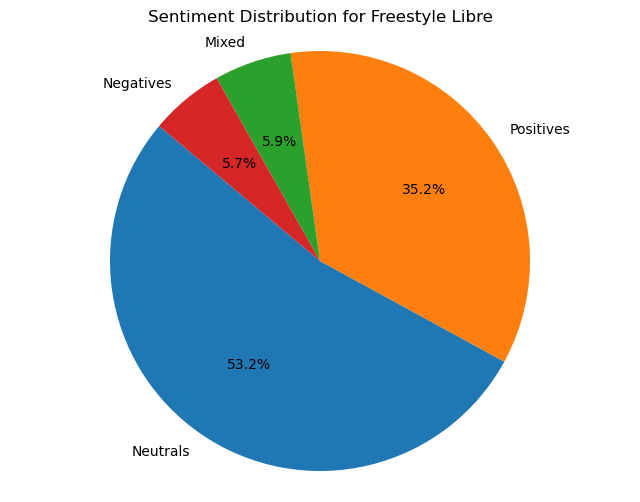

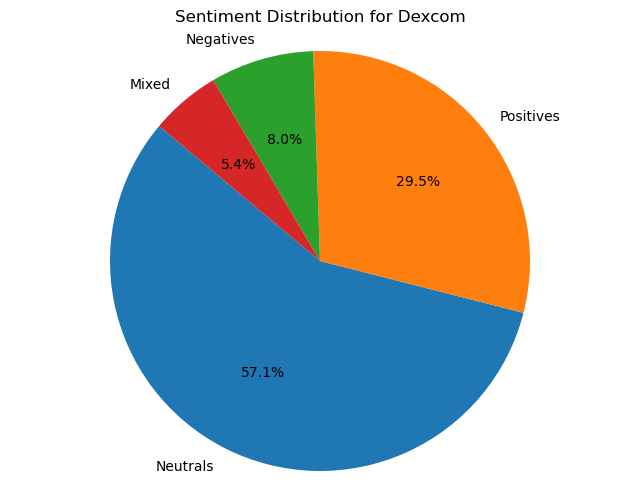

In [235]:
# Calculate sentiment counts for Freestyle data
freestyle_sentiment_counts = freestyle_data['Sentiment'].value_counts()

# Create a pie chart for Freestyle sentiment distribution
plt.figure(figsize=(8, 6))
plt.pie(freestyle_sentiment_counts, labels=freestyle_sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution for Freestyle Libre')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

# Calculate sentiment counts for Dexcom data
dexcom_sentiment_counts = dexcom_data['Sentiment'].value_counts()

# Create a pie chart for Dexcom sentiment distribution
plt.figure(figsize=(8, 6))
plt.pie(dexcom_sentiment_counts, labels=dexcom_sentiment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution for Dexcom')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

In [236]:
dexcom_text = ' '.join(dexcom_data['Sound Bite Text'].astype(str))

# Combine all text related to Freestyle Libre into one string
freestyle_text = ' '.join(freestyle_data['Sound Bite Text'].astype(str))

# TF-IDF Vectorizer
tfidf = TfidfVectorizer(stop_words='english', max_features=100)

# Fit and transform Dexcom text data
dexcom_tfidf = tfidf.fit_transform([dexcom_text])

# Fit and transform Freestyle Libre text data
freestyle_tfidf = tfidf.fit_transform([freestyle_text])

# Get feature names from TF-IDF for Dexcom and Freestyle Libre
dexcom_feature_names = tfidf.get_feature_names_out()
freestyle_feature_names = tfidf.get_feature_names_out()

# Find top features for Dexcom and Freestyle Libre
top_dexcom_features = dexcom_feature_names[np.argsort(-dexcom_tfidf.toarray()[0])][:20]
top_freestyle_features = freestyle_feature_names[np.argsort(-freestyle_tfidf.toarray()[0])][:20]

print("Top features for Dexcom:")
print(top_dexcom_features)

print("\nTop features for Freestyle Libre:")
print(top_freestyle_features)

Top features for Dexcom:
['days' 'people' 'cgm' 'eat' 'insurance' 'times' 'health' 'didnt' 'test'
 'id' 'really' 'brace' 'years' 'life' 'hours' 'ago' 'pump' 'getting'
 'type' 'free']

Top features for Freestyle Libre:
['libre' 'freestyle' 'glucose' 'cgm' 'blood' 'dexcom' 'sensor' 'use'
 'like' 'using' 'sugar' 'diabetes' 'insulin' 'dont' 'day' 'time' 'app'
 'sensors' 'insurance' 'monitor']


In [ ]:
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import TfidfVectorizer
sid = SentimentIntensityAnalyzer()
from gensim import corpora, models
from pprint import pprint
# Sentiment analysis
sid = SentimentIntensityAnalyzer()
df['Sentiment'] = df['Sound Bite Text'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Create a list of token lists for gensim
token_lists = df['Tokens'].tolist()

# Create a dictionary representation of the documents
dictionary = corpora.Dictionary(token_lists)

# Transform the collection of texts to a numerical form
corpus = [dictionary.doc2bow(text) for text in token_lists]

# Topic modeling using LDA
num_topics = 5  # Number of topics
lda_model = models.LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
topics = lda_model.print_topics(num_words=5)
#pprint(topics)

# Extracting keywords
keywords = dictionary.token2id
print(keywords)

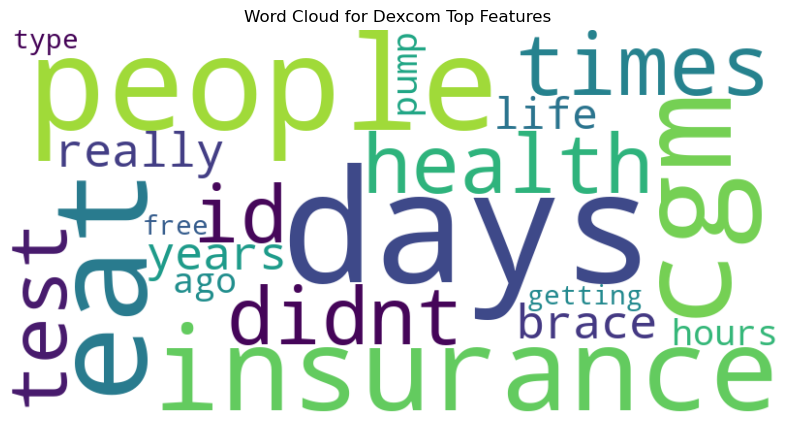

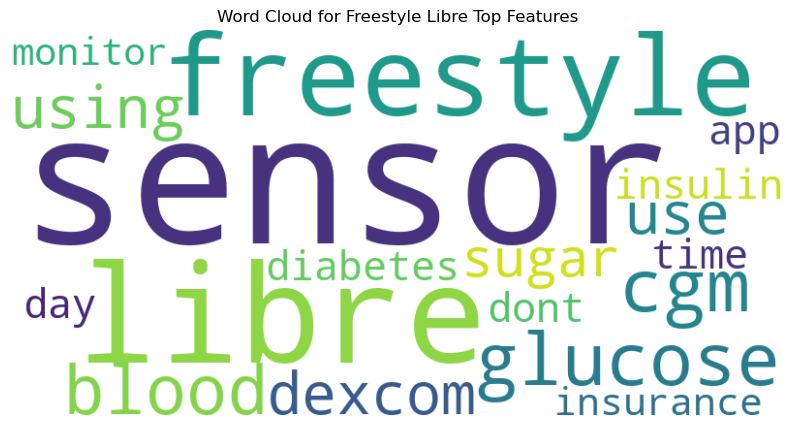

In [237]:
dexcom_wordcloud_text = ' '.join(top_dexcom_features)
freestyle_wordcloud_text = ' '.join(top_freestyle_features)

# Create word clouds for Dexcom
wordcloud_dexcom = WordCloud(width=800, height=400, background_color='white').generate(dexcom_wordcloud_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_dexcom, interpolation='bilinear')
plt.title('Word Cloud for Dexcom Top Features')
plt.axis('off')
plt.show()

# Create word clouds for Freestyle Libre
wordcloud_freestyle = WordCloud(width=800, height=400, background_color='white').generate(freestyle_wordcloud_text)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_freestyle, interpolation='bilinear')
plt.title('Word Cloud for Freestyle Libre Top Features')
plt.axis('off')
plt.show()

Categorized Dexcom Features:
{'accuracy': ['accuracy'], 'usability': ['usability'], 'price': ['price'], 'customer_service': []}

Categorized Freestyle Libre Features:
{'accuracy': ['accuracy', 'data accuracy', 'accuracy'], 'usability': ['usability'], 'price': [], 'customer_service': []}


To identify the most crucial benefits of CGMs for diabetes patients, you can perform sentiment analysis to determine the sentiment associated with discussions around CGMs. Positive sentiments often correlate with benefits or advantages.



In [ ]:
# Sentiment analysis
df['Sentiment'] = df['Sound Bite Text'].apply(lambda x: sid.polarity_scores(x)['compound'])

# Extracting text with positive sentiment
positive_sentiments = df[df['Sentiment'] > 0]['Sound Bite Text']
print(positive_sentiments)

Identifying unmet needs involves discovering topics or specific discussions where patients express dissatisfaction or desires for features, services, or aspects they're currently not receiving from CGMs.

In [ ]:
# Topic modeling using LDA again (potentially with a different number of topics)
# Extracting keywords or topics where sentiment is negative or neutral
negative_sentiments = df[df['Sentiment'] <= 0]['Sound Bite Text']
print(negative_sentiments)

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Download NLTK resources if not already downloaded
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Assuming you have a list of text data in 'positive_sentiments' and 'negative_sentiments' variables

# Function to preprocess text and extract specific POS words
def extract_pos_words(texts, pos_to_keep=('NN', 'NNS', 'JJ', 'VB')):
    pos_words = []
    stop_words = set(stopwords.words('english'))
    for text in texts:
        words = word_tokenize(text)
        words_pos = pos_tag(words)
        for word, pos in words_pos:
            if pos in pos_to_keep and word.lower() not in stop_words and word.isalpha():
                pos_words.append(word.lower())
    return pos_words

# Extract POS words from positive and negative sentiments
positive_pos_words = extract_pos_words(positive_sentiments)
negative_pos_words = extract_pos_words(negative_sentiments)

# Generate WordCloud for positive sentiments (benefits)
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(positive_pos_words))

# Generate WordCloud for negative sentiments (unmet needs)
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(negative_pos_words))

# Display WordCloud for positive sentiments (benefits)
plt.figure(figsize=(10, 6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Positive Sentiments (Benefits)')
plt.show()

# Display WordCloud for negative sentiments (unmet needs)
plt.figure(figsize=(10, 6))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Negative Sentiments (Unmet Needs)')
plt.show()


In [ ]:
from collections import Counter
def plot_top_words(words_list, title):
    word_counts = Counter(words_list)
    top_words = word_counts.most_common(10)  # Change the number to display more or fewer words
    
    # Extract words and counts for plotting
    words, counts = zip(*top_words)
    
    plt.figure(figsize=(10, 6))
    plt.bar(words, counts, color='skyblue')
    plt.title(title)
    plt.xlabel('Words')
    plt.ylabel('Occurrences')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

# Plot top words for positive sentiments (benefits)
plot_top_words(positive_pos_words, 'Top Words in Positive Sentiments (Benefits)')

# Plot top words for negative sentiments (unmet needs)
plot_top_words(negative_pos_words, 'Top Words in Negative Sentiments (Unmet Needs)')

In [ ]:
from itertools import combinations

stop_words = set(stopwords.words('english'))
punc = set(string.punctuation)
def preprocess(text):
    tokens = word_tokenize(text)
    tagged = pos_tag(tokens)
    filtered_tags = [(word, tag) for word, tag in tagged if tag not in ['DT', 'IN', 'TO'] and word not in stop_words and word not in punc]  # Filter out determiners, prepositions, and infinitive marker
    return [word for word, tag in filtered_tags]

def generate_co_occurrence(texts):
    word_pairs = []
    for text in texts:
        words = preprocess(text)
        word_pairs.extend(combinations(words, 2))  # Generate pairs of words
    return word_pairs

# Generate co-occurrence for positive and negative sentiments
positive_co_occurrence = generate_co_occurrence(positive_sentiments)
negative_co_occurrence = generate_co_occurrence(negative_sentiments)

# Count co-occurrences for positive sentiments
positive_co_occurrence_counts = Counter(positive_co_occurrence)
positive_co_occurrence_df = pd.DataFrame(positive_co_occurrence_counts.items(),
                                         columns=['Word Pair', 'Co-Occurrence Count (Positive)'])

# Count co-occurrences for negative sentiments
negative_co_occurrence_counts = Counter(negative_co_occurrence)
negative_co_occurrence_df = pd.DataFrame(negative_co_occurrence_counts.items(),
                                         columns=['Word Pair', 'Co-Occurrence Count (Negative)'])

# Display top co-occurring word pairs for positive sentiments
top_positive_co_occurrences = positive_co_occurrence_df.sort_values(by='Co-Occurrence Count (Positive)', ascending=False).head(10)
print("Top Co-Occurring Word Pairs for Positive Sentiments:")
print(top_positive_co_occurrences)

# Display top co-occurring word pairs for negative sentiments
top_negative_co_occurrences = negative_co_occurrence_df.sort_values(by='Co-Occurrence Count (Negative)', ascending=False).head(10)
print("\nTop Co-Occurring Word Pairs for Negative Sentiments:")
print(top_negative_co_occurrences)

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
for topic_id in range(num_topics):
    wordcloud = WordCloud(background_color='white').generate_from_frequencies(dict(lda_model.show_topic(topic_id, topn=20)))
    plt.figure()
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.title(f"Topic {topic_id} Word Cloud")
    plt.axis("off")

# Method 2: Bar Plots for Word Distribution in Topics
fig, axes = plt.subplots(num_topics, 1, figsize=(10, 6*num_topics))
for i in range(num_topics):
    sns.barplot(x='word', y='importance', data=pd.DataFrame(lda_model.show_topic(i, topn=10), columns=['word', 'importance']), ax=axes[i])
    axes[i].set_title(f"Topic {i} Word Distribution")
    axes[i].set_ylabel('Importance')
    axes[i].set_xlabel('Word')

# Method 3: Interactive Topic Modeling Visualization using pyLDAvis
lda_display = gensimvis.prepare(lda_model, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

# Method 4: Topic Composition across Documents (replace 'your_column' with the appropriate column)
topic_distribution = lda_model.get_document_topics(corpus)
df['Topic'] = [max(prob, key=lambda x: x[1])[0] for prob in topic_distribution]
sns.histplot(data=df, x='Topic', kde=True)

# Method 5: Topic Trend Analysis (replace 'your_date_column' with the appropriate date column)
# ...

# Method 6: Keyword Extraction within Topics
# ...

# Method 7: Sentiment Analysis per Topic
# ...

# Method 8: Association Rules Analysis
# ...

plt.tight_layout()
plt.show()

In [ ]:
df

Based on these word distributions, you might interpret Topic 0 as related to sugar levels, Topic 1 as about monitoring diabetes, Topic 2 about specific devices or apps, Topic 3 concerning insurance and medication, and Topic 4 focused on specific brands or devices.

In [ ]:
df['Media Link']